In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

In [2]:
# probability_of_neutral_mutation?

In [3]:
MUTANT_PREDS = pd.read_csv("thermomutdb_prediction_results_mutant.csv")
UNALTERED_PREDS = pd.read_csv("thermomutdb_prediction_results_unaltered.csv")

In [4]:
for column in ["US-Align", "pLDDT_of_variant_residue", "avg_pLDDT"]:
    print(f"Avg. {column}: {np.average(UNALTERED_PREDS[column])}")

print(f"Total samples: {len(UNALTERED_PREDS)}")


Avg. US-Align: 0.6952846078431373
Avg. pLDDT_of_variant_residue: 0.9061319843226788
Avg. avg_pLDDT: 0.8156657252450982
Total samples: 1020


In [5]:
us_align_t_statistic, us_align_p_score = ttest_rel(UNALTERED_PREDS["US-Align"].to_numpy(), MUTANT_PREDS["US-Align"].to_numpy())
pLDDT_of_variant_residue_t_statistic, pLDDT_of_variant_residue_p_score = ttest_rel(UNALTERED_PREDS["pLDDT_of_variant_residue"].to_numpy(), MUTANT_PREDS["pLDDT_of_variant_residue"].to_numpy())
avg_pLDDT_t_statistic, avg_pLDDT_p_score = ttest_rel(UNALTERED_PREDS["avg_pLDDT"].to_numpy(), MUTANT_PREDS["avg_pLDDT"].to_numpy())

print("**Pairwise:")
print(f"US-Align - Means: {(np.mean(UNALTERED_PREDS['US-Align'].to_numpy()), np.mean(MUTANT_PREDS['US-Align'].to_numpy()))}, T-Statistic: {us_align_t_statistic}, P-Value: {us_align_p_score}")
print(f"pLDDT Variant Amino Acid - Means: {(np.mean(UNALTERED_PREDS['pLDDT_of_variant_residue'].to_numpy()), np.mean(MUTANT_PREDS['pLDDT_of_variant_residue'].to_numpy()))}, T-Statistic: {pLDDT_of_variant_residue_t_statistic}, P-Value: {pLDDT_of_variant_residue_p_score}")
print(f"pLDDT Average - Means: {(np.mean(UNALTERED_PREDS['avg_pLDDT'].to_numpy()), np.mean(MUTANT_PREDS['avg_pLDDT'].to_numpy()))}, T-Statistic: {avg_pLDDT_t_statistic}, P-Value: {avg_pLDDT_p_score}")

us_align_t_statistic, us_align_p_score = ttest_ind(UNALTERED_PREDS["US-Align"].to_numpy(), MUTANT_PREDS["US-Align"].to_numpy(), equal_var=False)
pLDDT_of_variant_residue_t_statistic, pLDDT_of_variant_residue_p_score = ttest_ind(UNALTERED_PREDS["pLDDT_of_variant_residue"].to_numpy(), MUTANT_PREDS["pLDDT_of_variant_residue"].to_numpy(), equal_var=False)
avg_pLDDT_t_statistic, avg_pLDDT_p_score = ttest_ind(UNALTERED_PREDS["avg_pLDDT"].to_numpy(), MUTANT_PREDS["avg_pLDDT"].to_numpy(), equal_var=False)

print("__Independent:")
print(f"US-Align - Means: {(np.mean(UNALTERED_PREDS['US-Align'].to_numpy()), np.mean(MUTANT_PREDS['US-Align'].to_numpy()))}, T-Statistic: {us_align_t_statistic}, P-Value: {us_align_p_score}")
print(f"pLDDT Variant Amino Acid - Means: {(np.mean(UNALTERED_PREDS['pLDDT_of_variant_residue'].to_numpy()), np.mean(MUTANT_PREDS['pLDDT_of_variant_residue'].to_numpy()))}, T-Statistic: {pLDDT_of_variant_residue_t_statistic}, P-Value: {pLDDT_of_variant_residue_p_score}")
print(f"pLDDT Average - Means: {(np.mean(UNALTERED_PREDS['avg_pLDDT'].to_numpy()), np.mean(MUTANT_PREDS['avg_pLDDT'].to_numpy()))}, T-Statistic: {avg_pLDDT_t_statistic}, P-Value: {avg_pLDDT_p_score}")

**Pairwise:
US-Align - Means: (0.6952846078431373, 0.6930359901960784), T-Statistic: 4.688760783104522, P-Value: 3.1220803854006043e-06
pLDDT Variant Amino Acid - Means: (0.9061319843226788, 0.9012977146050509), T-Statistic: 3.9391825824704627, P-Value: 8.732713379941153e-05
pLDDT Average - Means: (0.8156657252450982, 0.8151250748039216), T-Statistic: 1.0914773835086462, P-Value: 0.2753208799831827
__Independent:
US-Align - Means: (0.6952846078431373, 0.6930359901960784), T-Statistic: 0.31892533174836546, P-Value: 0.749815818172465
pLDDT Variant Amino Acid - Means: (0.9061319843226788, 0.9012977146050509), T-Statistic: 0.9701063688800057, P-Value: 0.33210859545074334
pLDDT Average - Means: (0.8156657252450982, 0.8151250748039216), T-Statistic: 0.1288702830076112, P-Value: 0.8974730093886931


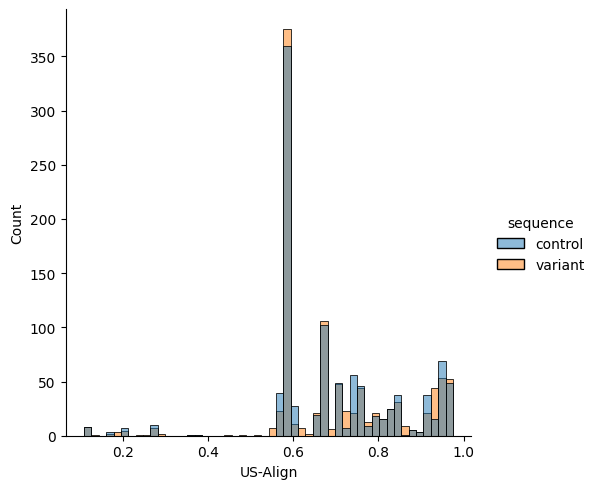

In [16]:
import seaborn as sns

unaltered_with_sequence_type = UNALTERED_PREDS
unaltered_with_sequence_type["sequence"] = "control"
mutant_with_sequence_type = MUTANT_PREDS
mutant_with_sequence_type["sequence"] = "variant"
combined = pd.concat([UNALTERED_PREDS, MUTANT_PREDS])

sns.displot(combined, x="US-Align", bins=50, hue="sequence")

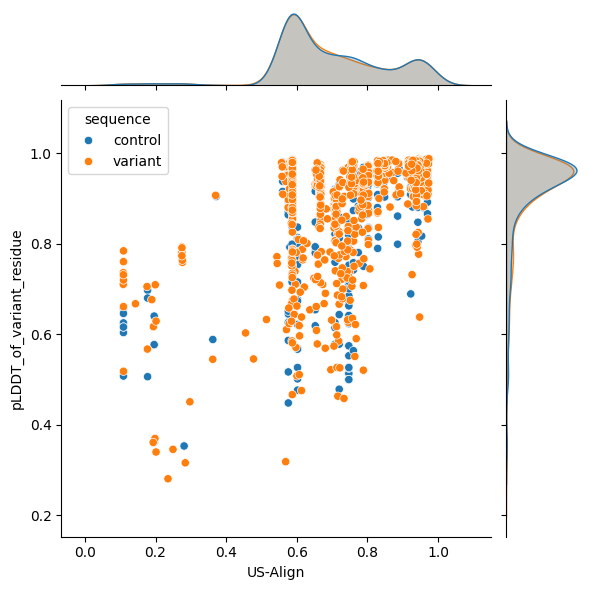

In [17]:
sns.jointplot(data=combined, x="US-Align", y="pLDDT_of_variant_residue", hue="sequence")

<Axes: xlabel='pLDDT_of_variant_residue'>

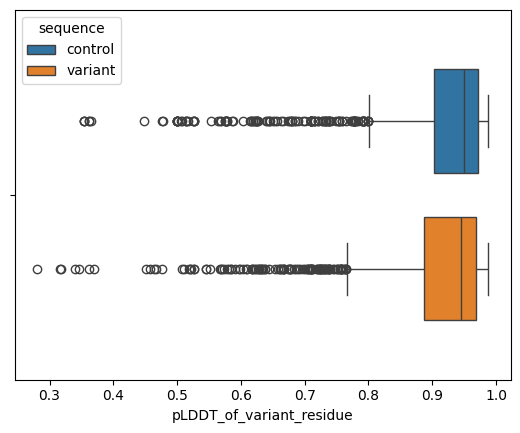

In [25]:
sns.boxplot(data=combined, x="pLDDT_of_variant_residue", hue="sequence", gap=0.3)